In [75]:
import csv
import re
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [56]:
x = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = x[['Review Text','Rating','Class Name','Age']]
x
# The dataset is as belows with 23.5k rows and 11 columns

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 4 columns):
Review Text    22641 non-null object
Rating         23486 non-null int64
Class Name     23472 non-null object
Age            23486 non-null int64
dtypes: int64(2), object(2)
memory usage: 734.0+ KB


In [ ]:
# In the given dataset
# No of unique classes  =  21
# No of unique divisions  =  4
# No of unique departments  =  7
# No of unique ratings  =  5
# No of unique ages  =  77
# No of unique positive feedback  =  82

In [54]:
df.describe()

,Rating,Age
count,23486.000000,23486.000000
mean,4.196032,43.198544
std,1.110031,12.279544
min,1.000000,18.000000
25%,4.000000,34.000000
50%,5.000000,41.000000
75%,5.000000,52.000000
max,5.000000,99.000000


In [61]:
#Fills all NaN values under review text with 0 values
df['Review Text'] = df['Review Text'].fillna('') 

#Count vectorizer forms a table of the entire text in rows and column and all columns will have words and rows will determine each entity, if the word is present in a particular review then the cell will be 1 else 0
vectorizer = CountVectorizer()

#Builds an analyzer function which applies preprocessing, tokenization, remove stop words and creates n-grams.
analyzer = vectorizer.build_analyzer()

D:\SOFTWARES\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [63]:
def wordcounts(s):
    c = {}
    if analyzer(s):
        d = {}
        # fit_transform is a function that works similar to the fit function i.e. by calculating the mean and standard deviation(what fit does) and transofrm is used to apply transformation to a particular set of examples, fit_transform is a combo of both functions.
        # toarray returns an ndarray so here, 
        # what we're doing is first taking each string of words vectorizing it(i.e count vectorizing) and then fitting it by calculating mean and std dev and transforming it, by converting it to a list first, then converting it to an N dim array
        w = vectorizer.fit_transform([s]).toarray()
        
        # vocabulary_ reurns a dictionary with all words in review text assigned to a particular integral value
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k
        for index,i in enumerate(w[0]):
            c[d[index]] = i
    return c

In [64]:
# Pandas uses the apply function to the use a function to an entire column
df['Word Counts'] = df['Review Text'].apply(wordcounts)

df.head()

D:\SOFTWARES\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Review Text,Rating,Class Name,Age,Word Counts
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,I had such high hopes for this dress and reall...,3,Dresses,60,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


Selected Words
love     8951
great    6117
super    1726
happy     705
glad      614
dtype: int64

Class Names
Dresses     6319
Knits       4843
Blouses     3097
Sweaters    1428
Pants       1388
Name: Class Name, dtype: int64


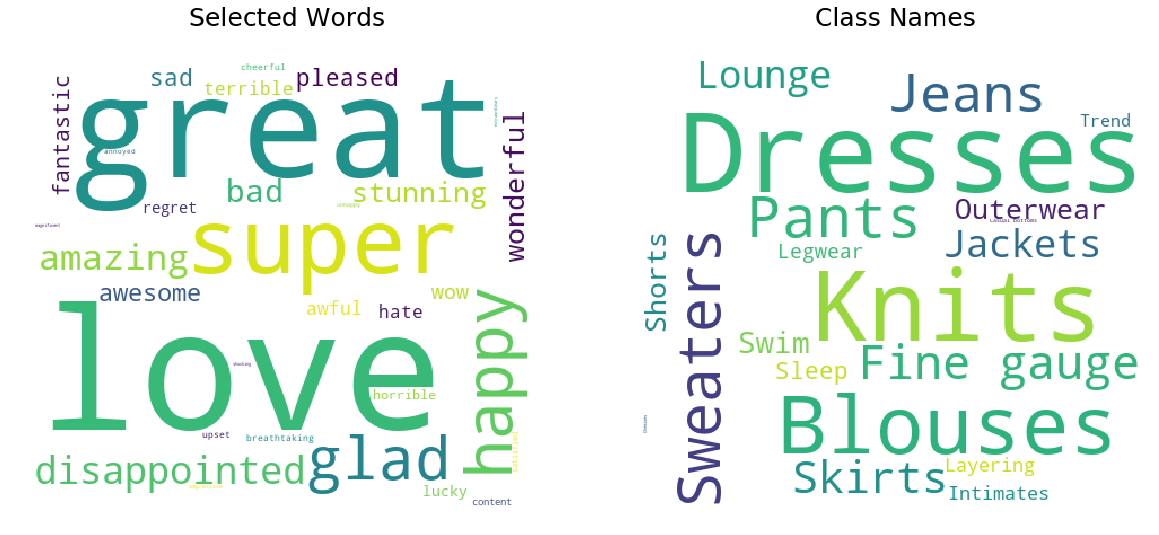

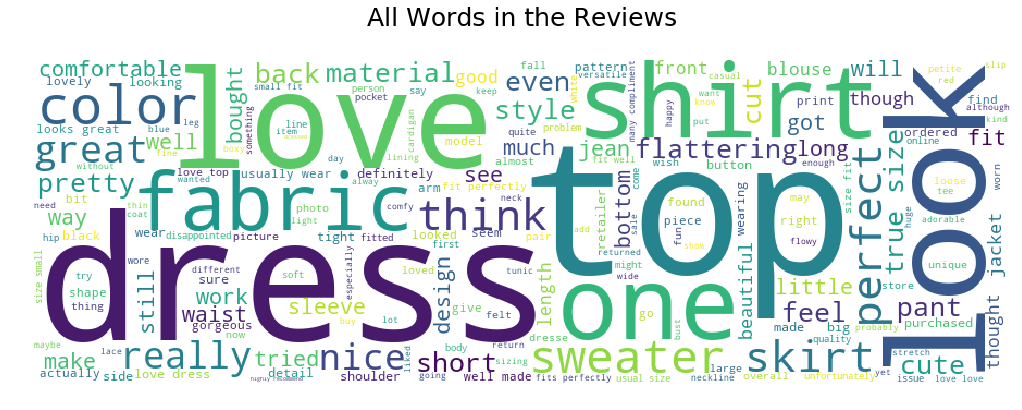

In [35]:
#some selected words which are crucial in determining sentiments, they include both positive and negative words
selectedwords=['awesome','great','fantastic','extraordinary','amazing','super','magnificent','stunning','impressive','wonderful','breathtaking','love','content','pleased','happy','glad','satisfied','lucky','shocking','cheerful','wow','sad','unhappy','horrible','regret','bad','terrible','annoyed','disappointed','upset','awful','hate']


def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = df.copy() #copies the list but drawback is it is static and only one copy exist for it  
for word in selectedwords:
    #dfwc was generated after vocabulary and then we pass parameters as follows and selected count gives out only the number of words in the selected list
    dfwc[word] = dfwc['Word Counts'].apply(selectedcount,args=(word,))
    
word_sum = dfwc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:5])

# since we do not know the product names, we decided to check the product class names. By doing this, we may at least learn the most prefered classes.
print('\nClass Names')
print(df['Class Name'].fillna("Empty").value_counts().iloc[:5])

#WordCloud is a package to generate the given figures according to their frequencies used

fig, ax = plt.subplots(1,2,figsize=(20,10))
wc0 = WordCloud(background_color='white',
                      width=450,
                      height=400 ).generate_from_frequencies(word_sum)

cn = df['Class Name'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white',
                      width=450,
                      height=400 
                     ).generate_from_frequencies(cn)

ax[0].imshow(wc0)
ax[0].set_title('Selected Words\n',size=25)
ax[0].axis('off')

ax[1].imshow(wc1)
ax[1].set_title('Class Names\n',size=25)
ax[1].axis('off')

rt = df['Review Text']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(rt))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()



In [71]:
# Rating of 4 or higher -> positive
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral
df = df[df['Rating'] != 3] # I take the column under ratin where i eliminate the neutral rating.
df['Sentiment'] = df['Rating'] >=4 # if the entries under rating are >=4 then it is treated as true under a new sentiment column and false otherwise.
df.head()

,Review Text,Rating,Class Name,Age,Word Counts,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
5,"I love tracy reese dresses, but this one is no...",2,Dresses,49,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False


In [72]:
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
X = vectorizer.fit_transform(train_data['Review Text'])
y = train_data['Sentiment']

D:\SOFTWARES\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [ ]:
# We shall be using 4 different types of models and using the appropriate ones for further use. Here I am just showing the different times used for each model for simplicity of use and explanation

In [85]:
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X,y)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.890419


In [86]:
# MultinomialNB implements the naive Bayes algorithm for multinomially distributed data
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X,y)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.015662


In [81]:
start=dt.datetime.now()
svm = SVC()
svm.fit(X,y)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:39.090466


In [82]:
start=dt.datetime.now()
nn = MLPClassifier()
nn.fit(X,y)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:04:19.483188


In [88]:
df1=pd.DataFrame({'Logistic Regression':lr.predict_proba(X)[:,1], 'Naive Bayes':nb.predict_proba(X)[:,1],'SVM':svm.decision_function(X),'Neural Network':nn.predict_proba(X)[:,1]})
df['Logistic Regression']=round(df1['Logistic Regression'],2)
df['Naive Bayes']=round(df1['Naive Bayes'],2)
df['Neural Network']=round(df1['Neural Network'],2)

df.head(50)

,Review Text,Rating,Class Name,Age,Word Counts,Sentiment,Logistic Regression,Naive Bayes,Neural Network
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True,0.95,0.97,1.00
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True,0.96,0.99,1.00
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True,0.83,0.79,1.00
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True,1.00,1.00,1.00
5,"I love tracy reese dresses, but this one is no...",2,Dresses,49,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False,0.93,0.02,1.00
6,I aded this in my basket at hte last mintue to...,5,Knits,39,"{'aded': 1, 'all': 1, 'am': 1, 'and': 3, 'as':...",True,1.00,1.00,1.00
7,"I ordered this in carbon for store pick up, an...",4,Knits,39,"{'already': 1, 'also': 1, 'always': 1, 'and': ...",True,1.00,1.00,1.00
8,I love this dress. i usually get an xs but it ...,5,Dresses,24,"{'an': 1, 'and': 1, 'bust': 1, 'but': 1, 'dres...",True,1.00,1.00,1.00
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,Dresses,34,"{'125': 1, '34b': 1, 'an': 1, 'and': 1, 'busty...",True,1.00,1.00,1.00
11,This dress is perfection! so pretty and flatte...,5,Dresses,39,"{'and': 1, 'dress': 1, 'flattering': 1, 'is': ...",True,0.99,1.00,1.00
